<a href="https://colab.research.google.com/github/Vannod/Simulacion-I/blob/main/P2/Monte_Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estimación del número pi

## Solución por simulación

### Librerias

In [8]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

### Método de Monte Carlo

In [21]:
def MonteCarlo(n):
    count = 0
    circulo = []  # Puntos dentro del círculo
    cuadrado = []  # Puntos fuera del círculo
    area = []  # Estimación del área
    for i in range(1, n+1):
        x = rnd.uniform(-1, 1)
        y = rnd.uniform(-1, 1)
        if (x**2 + y**2) <= 1:  # Condición para estar dentro del círculo
            count += 1
            circulo.append((x, y))
        else:
            cuadrado.append((x, y))

        Pi = (count / i) * 4  # Estimación de Pi
        area.append(Pi)

    return area, circulo, cuadrado

n = 100000
area, circulo, cuadrado = MonteCarlo(n)
print(f"Pi estimado: {area[-1]}")

Pi estimado: 3.14412


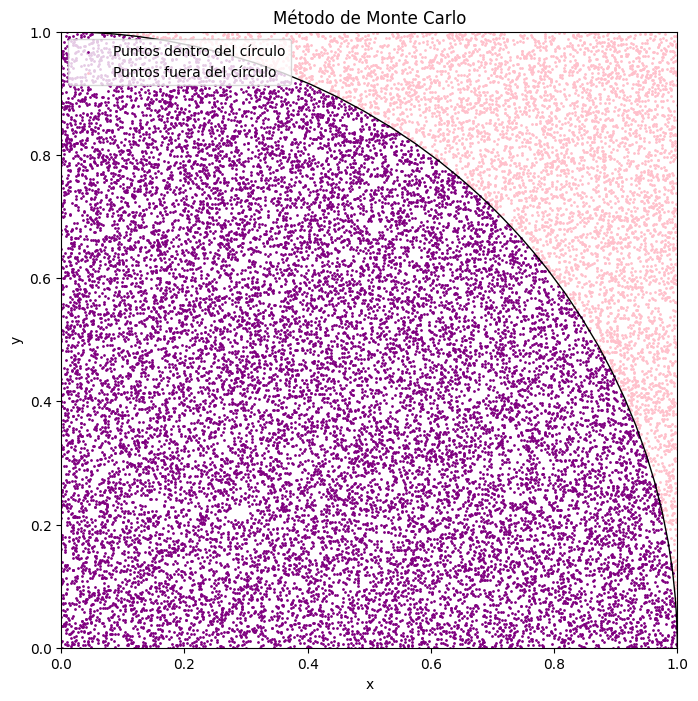

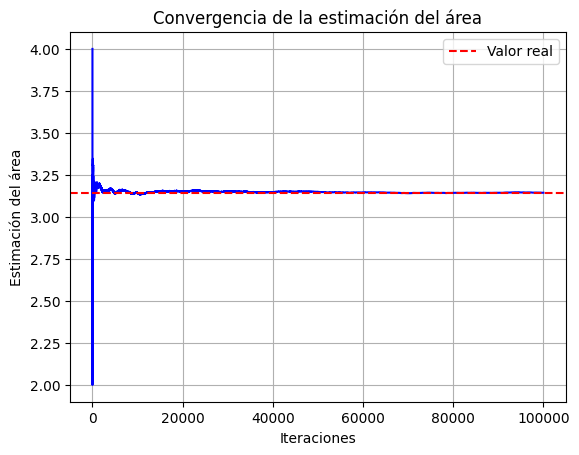

In [22]:
# Graficar los puntos
plt.figure(figsize=(8, 8))
plt.scatter([p[0] for p in circulo], [p[1] for p in circulo], color='purple', s=1, label='Puntos dentro del círculo')
plt.scatter([p[0] for p in cuadrado], [p[1] for p in cuadrado], color='pink', s=1, label='Puntos fuera del círculo')

# Arco
circle = plt.Circle((0, 0), 1, color='black', fill=False)
plt.gca().add_patch(circle)

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Método de Monte Carlo')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Gráfica de convergencia
plt.plot(range(1, n+1), area, color='blue')
plt.axhline(y=np.pi, color='red', linestyle='--', label='Valor real')
plt.title('Convergencia de la estimación del área')
plt.xlabel('Iteraciones')
plt.ylabel('Estimación del área')
plt.legend()
plt.grid(True)
plt.show()

## Solución analítica

Definimos un cuadrado de lado 2 y un círuculo inscrito de radio 1 y calculamos el área de ambos y sacamos su cociente
$$
\text{Área cuadrado}=(2)(2)=4
\\
\text{Área círculo}=\pi(1)^2=π
\\
\frac{\pi}{4}
$$

Generamos dos variables aleatorias $x$ y $y$ de distribución uniforme $(-1, 1)$

Se debe cumplir la siguiente condición:
$$
x^2+y^2≤1
$$
Si esta condición se cumple, está dentro del círculo.

Ahora calculamos la proporción entre los puntos generados y los que están dentro del círculo
$$
\frac{\text{Puntos dentro del círculo}}{\text{Total de puntos}}
$$

Lo cual es una proporción que también se acerca a π, por tanto
$$
\frac{\text{Puntos dentro del círculo}}{\text{Total de puntos}}≈\frac{\pi}{4}
\\
π≈4⋅\frac{\text{Puntos dentro del círculo}}{\text{Total de puntos}}
$$